##### Load Packages

In [1]:
!pip install dtale

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [45]:
# 1. Data Loading
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [46]:
# 2. Initial Data Exploration
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)
print("\nTrain data info:")
print(train.info())

print("\nTest data info:")
print(test.info())

print("\nMissing values in train data:")
print(train.isnull().sum())

print("\nMissing values in test data:")
print(test.isnull().sum())

Train data shape: (8523, 12)
Test data shape: (5681, 11)

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), obje

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [48]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [49]:
print(train['Item_Weight'].describe())
print(test['Item_Weight'].describe())

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64
count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64


Item Weight Variance - Original: 21.56168825983637
Item Weight Variance - Mean: 17.860121735060453
Item Weight Variance - Median: 17.869561454073366


<Axes: >

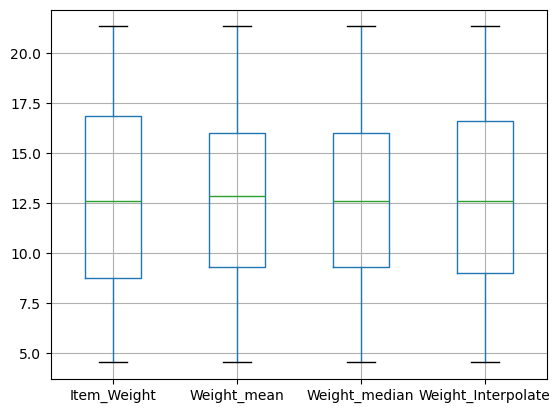

In [50]:
# 3.Handling Missing values in Item Size in training data
mean_wt=train['Item_Weight'].mean()
median_wt=train['Item_Weight'].median()
##Univariate Imputation
train['Weight_mean']=train['Item_Weight'].fillna(mean_wt)
train['Weight_median']=train['Item_Weight'].fillna(median_wt)

##Check for variance to choose the best method
print("Item Weight Variance - Original:", train['Item_Weight'].var())
print("Item Weight Variance - Mean:", train['Weight_mean'].var())
print("Item Weight Variance - Median:", train['Weight_median'].var())
## plot the item_weight in a line (original, mean, median, interpolation) - choose the best based on that for best interpolation
##Using Interpolate function - linear interpolation (missing values replaced based on neighbouring values)
train['Weight_Interpolate'] = train['Item_Weight'].interpolate(method ="linear")

train[['Item_Weight', 'Weight_mean', 'Weight_median','Weight_Interpolate']].boxplot()

Item Weight Variance - Original: 21.760812343231475
Item Weight Variance - Mean: 18.021630503971995
Item Weight Variance - Median: 18.027077062656364
Item Weight Variance - Interpolate: 19.990913374786285


<Axes: >

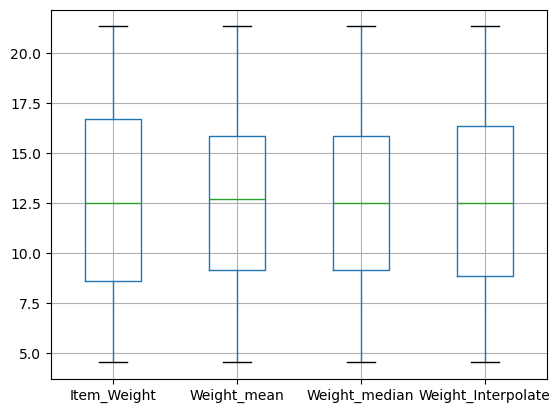

In [51]:
# 3.1Handling Missing values in Item Size in testing data
mean_wt_tst=test['Item_Weight'].mean()
median_wt_tst=test['Item_Weight'].median()
##Univariate Imputation
test['Weight_mean']=test['Item_Weight'].fillna(mean_wt_tst)
test['Weight_median']=test['Item_Weight'].fillna(median_wt_tst)

##Check for variance to choose the best method
print("Item Weight Variance - Original:", test['Item_Weight'].var())
print("Item Weight Variance - Mean:", test['Weight_mean'].var())
print("Item Weight Variance - Median:", test['Weight_median'].var())

## plot the item_weight in a line (original, mean, median, interpolation) - choose the best based on that for best interpolation
##Using Interpolate function - linear interpolation (missing values replaced based on neighbouring values)
test['Weight_Interpolate'] = test['Item_Weight'].interpolate(method ="linear")
print("Item Weight Variance - Interpolate:", test['Weight_Interpolate'].var())
test[['Item_Weight', 'Weight_mean', 'Weight_median','Weight_Interpolate']].boxplot()

In [52]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Weight_mean                     0
Weight_median                   0
Weight_Interpolate              0
dtype: int64

In [56]:
train = train.drop(['Weight_mean','Weight_median','Item_Weight'],axis=1)
test = test.drop(['Weight_mean','Weight_median','Item_Weight'],axis=1)
print(train['Weight_Interpolate'].describe())

count    8523.000000
mean       12.831222
std         4.445074
min         4.555000
25%         9.000000
50%        12.600000
75%        16.600000
max        21.350000
Name: Weight_Interpolate, dtype: float64


In [57]:
train['Outlet_Size']  #it is a categorical value

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [58]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [59]:
train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [60]:
## 4. Handle Missing Values -Outlet Size --Train Data
print(train['Outlet_Size'].value_counts())
print(train['Outlet_Type'].value_counts())
print(train['Outlet_Location_Type'].value_counts())

mode_store = train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
print(mode_store)

missing_values = train['Outlet_Size'].isnull()

train.loc[missing_values,'Outlet_Size'] = train.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_store[x])

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [61]:
train.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Weight_Interpolate           0
dtype: int64

In [62]:
## 4.2 Handle Missing Values -Outlet Size --Test Data
print(test['Outlet_Size'].value_counts())
print(test['Outlet_Type'].value_counts())
print(test['Outlet_Location_Type'].value_counts())

mode_store = test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
print(mode_store)

missing_values = test['Outlet_Size'].isnull()

test.loc[missing_values,'Outlet_Size'] = test.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_store[x])

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: count, dtype: int64
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [63]:
# 5. Data Preprocessing and Feature Engineering
# Save identifiers for later
train_identifiers = train[['Item_Identifier', 'Outlet_Identifier']].copy()
test_identifiers = test[['Item_Identifier', 'Outlet_Identifier']].copy()

# Combine train and test for preprocessing
test['Item_Outlet_Sales'] = 0  # temporary column for test data
combined = pd.concat([train, test], axis=0)

In [64]:
# Feature Engineering
# 5.1 Extract item category from Item_Identifier
combined['Item_Category'] = combined['Item_Identifier'].str[:2]
combined['Item_Category'] = combined['Item_Category'].map({
    'FD': 'Food',
    'DR': 'Drinks',
    'NC': 'Non-Consumable'
})

In [66]:
# 5.2 Calculate outlet age
import datetime as dt
current_year = dt.datetime.today().year
print(current_year)
combined['Outlet_Years'] = 2013 - combined['Outlet_Establishment_Year']

2025


In [67]:
# 5.3 Normalize Item_Fat_Content values
fat_content_map = {
    'Low Fat': 'Low Fat',
    'Regular': 'Regular',
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}
combined['Item_Fat_Content'] = combined['Item_Fat_Content'].map(fat_content_map)

In [68]:
# 5.4 Item_Visibility - log transform to handle skewness
combined['Item_Visibility_Interpol'] = combined['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [97]:
# from sklearn.preprocessing import OrdinalEncoder

# combined_encoded = combined.copy()

# cat_cols = combined.select_dtypes(include=['object']).columns
# print("train cols:", cat_cols)
# for col in cat_cols:
#     oe = OrdinalEncoder()
#     combined_encoded[col] = oe.fit_transform(combined_encoded[[col]])
#     print(oe.categories_)

from sklearn.preprocessing import OrdinalEncoder
combined_encoded = combined.copy()

# Get categorical columns and exclude identifiers
cat_cols = combined.select_dtypes(include=['object']).columns
cat_cols_to_encode = [col for col in cat_cols if col not in ['Item_Identifier', 'Outlet_Identifier']]

print("Categorical columns to encode:", cat_cols_to_encode)

# Apply ordinal encoding only to non-identifier categorical columns
for col in cat_cols_to_encode:
    oe = OrdinalEncoder()
    combined_encoded[col] = oe.fit_transform(combined_encoded[[col]])
    print(f"Categories for {col}:")
    print(oe.categories_)

Categorical columns to encode: ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category']
Categories for Item_Fat_Content:
[array(['Low Fat', 'Regular'], dtype=object)]
Categories for Item_Type:
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
Categories for Outlet_Size:
[array(['High', 'Medium', 'Small'], dtype=object)]
Categories for Outlet_Location_Type:
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
Categories for Outlet_Type:
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]
Categories for Item_Category:
[array(['Drinks', 'Food', 'Non-Consumable'], dtype=object)]


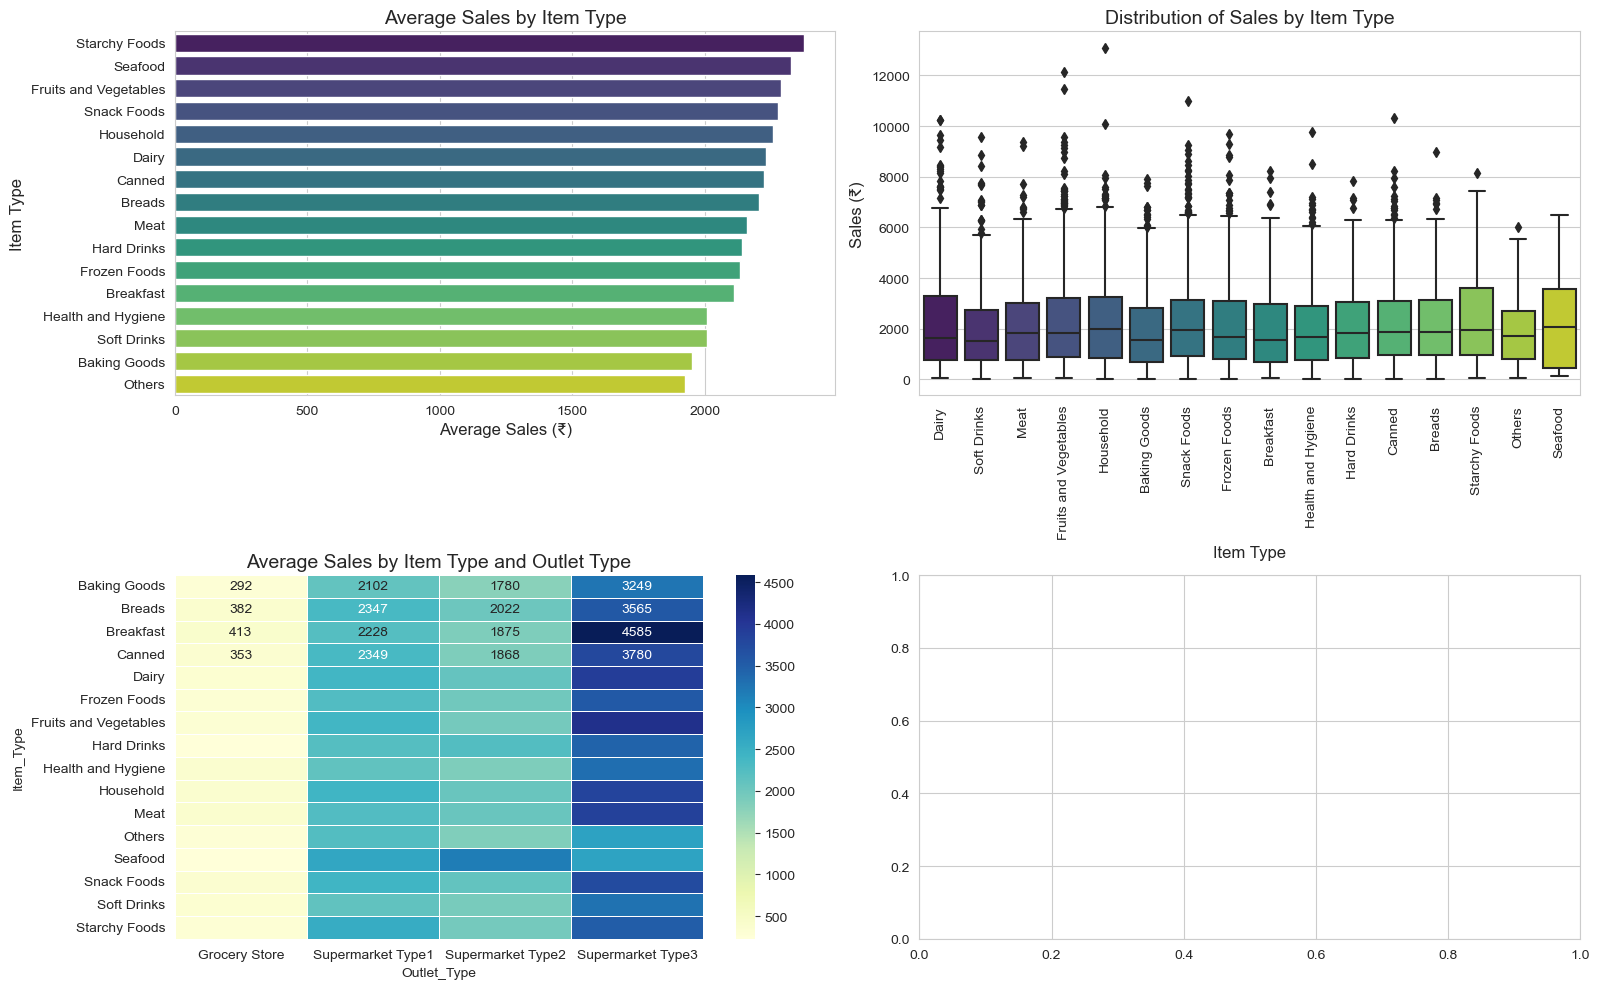

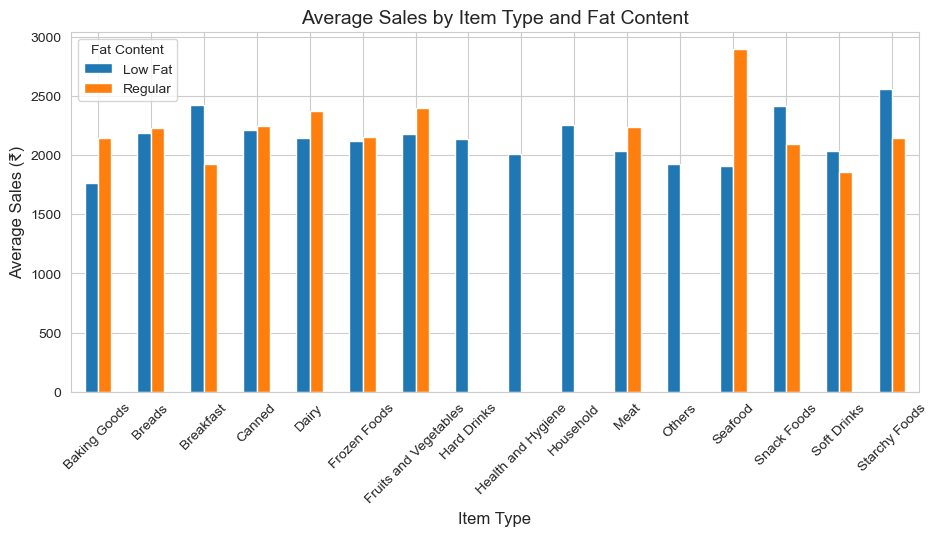

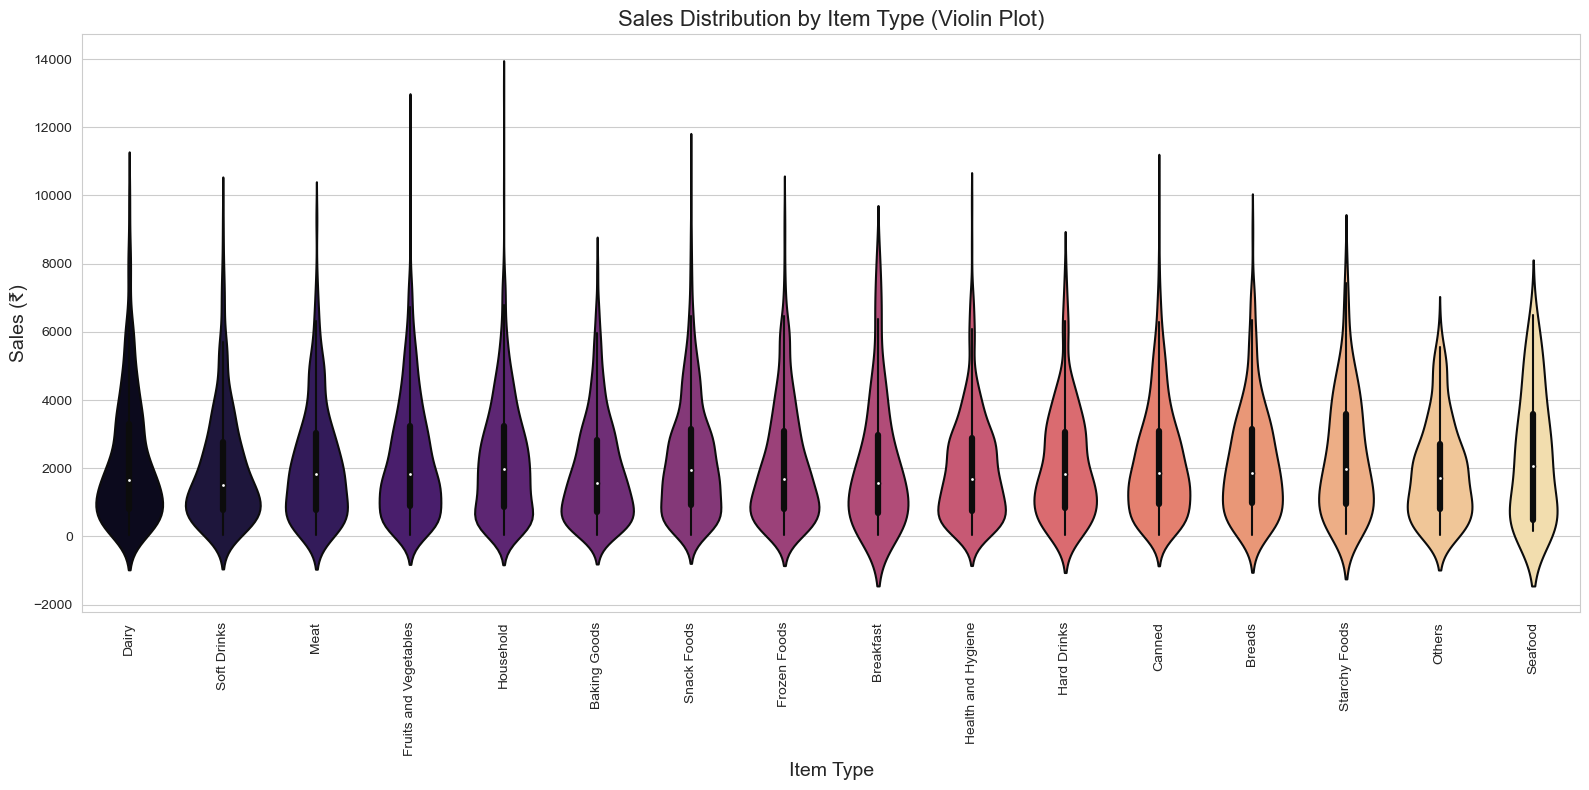

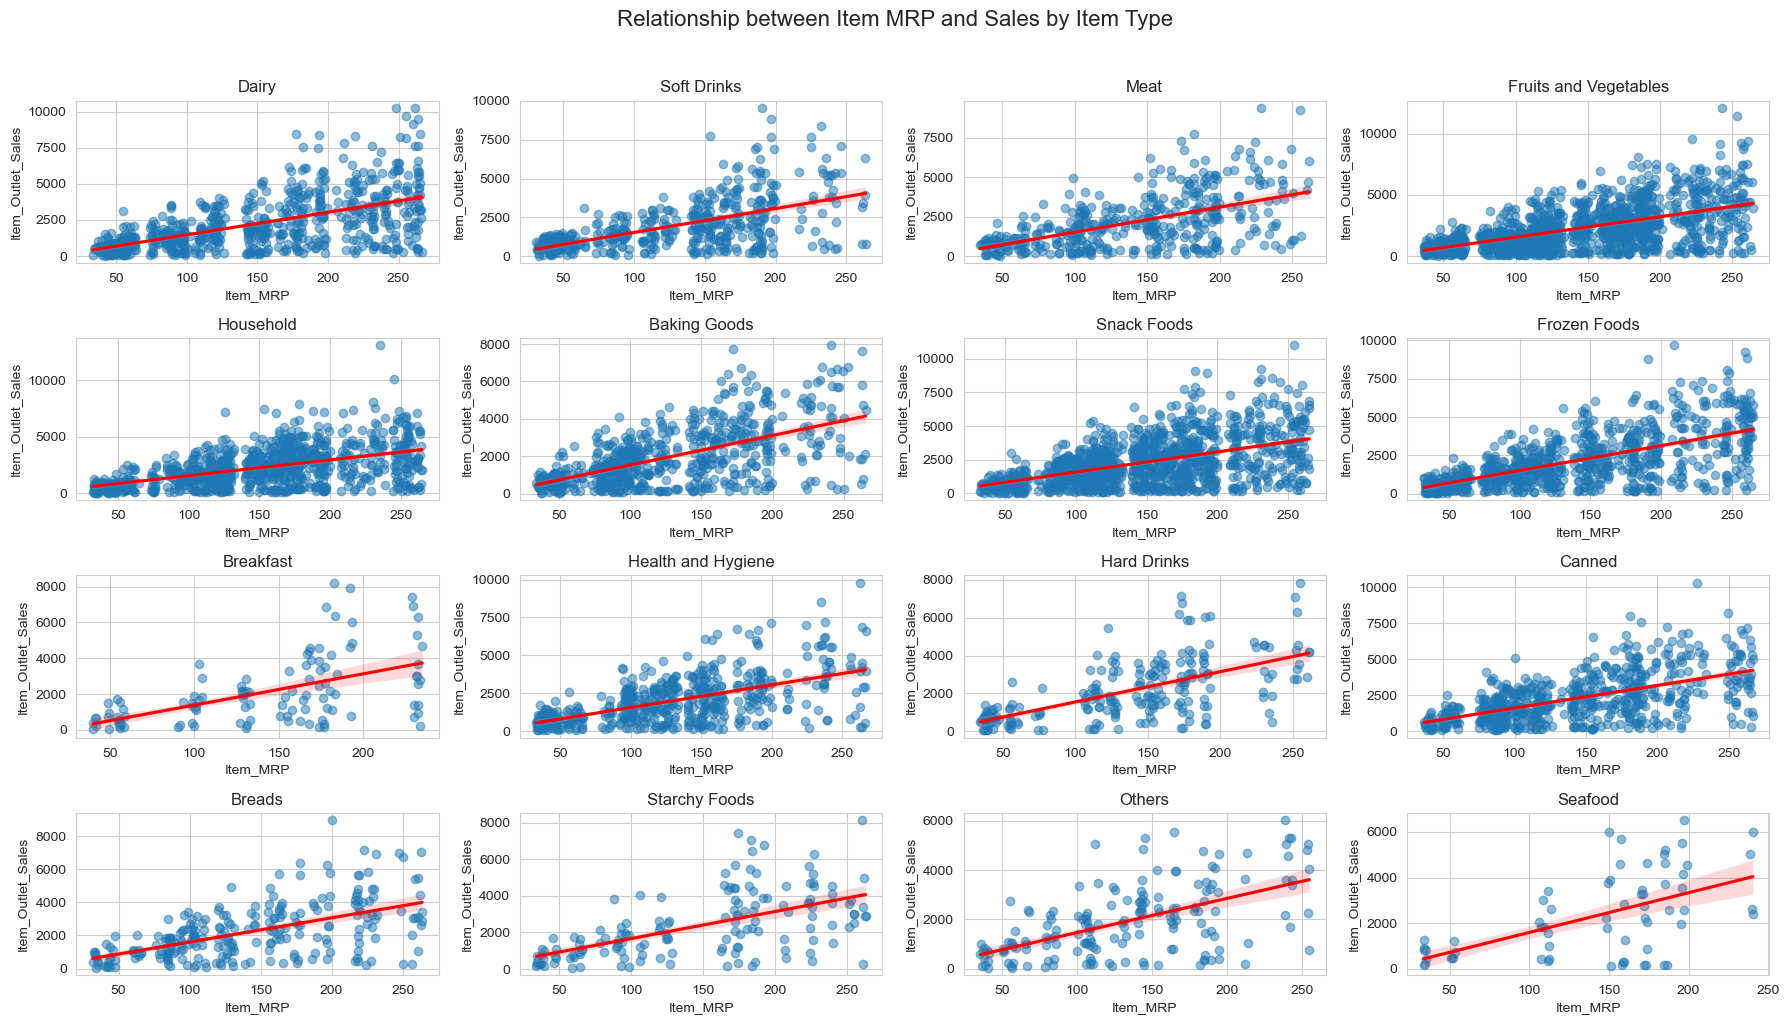

Top 3 Item Types by Average Sales:
Starchy Foods: ₹2374.33
Seafood: ₹2326.07
Fruits and Vegetables: ₹2289.01

Bottom 3 Item Types by Average Sales:
Soft Drinks: ₹2006.51
Baking Goods: ₹1952.97
Others: ₹1926.14

Variability in Sales by Item Type (Coefficient of Variation):
                          mean      std     cv
Item_Type                                     
Canned                 2225.19  1645.24  73.94
Others                 1926.14  1431.86  74.34
Breads                 2204.13  1644.24  74.60
Starchy Foods          2374.33  1773.95  74.71
Snack Foods            2277.32  1705.12  74.87
Household              2258.78  1692.25  74.92
Hard Drinks            2139.22  1606.19  75.08
Health and Hygiene     2010.00  1553.63  77.30
Meat                   2158.98  1695.23  78.52
Fruits and Vegetables  2289.01  1799.50  78.61
Baking Goods           1952.97  1546.79  79.20
Seafood                2326.07  1842.99  79.23
Frozen Foods           2132.87  1724.78  80.87
Soft Drinks           

In [181]:
# Set up a larger figure size and style for better visualization
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

# 1. Average sales by Item Type - Bar plot
plt.subplot(2, 2, 1)
avg_sales_by_type = train.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=avg_sales_by_type.values, y=avg_sales_by_type.index, palette='viridis')
plt.title('Average Sales by Item Type', fontsize=14)
plt.xlabel('Average Sales (₹)', fontsize=12)
plt.ylabel('Item Type', fontsize=12)
plt.tight_layout()

# 2. Distribution of Sales by Item Type - Box plot
plt.subplot(2, 2, 2)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette='viridis')
plt.title('Distribution of Sales by Item Type', fontsize=14)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Sales (₹)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

# 3. Sales by Item Type and Outlet Type - Heatmap
plt.subplot(2, 2, 3)
heatmap_data = train.pivot_table(values='Item_Outlet_Sales', 
                                index='Item_Type', 
                                columns='Outlet_Type', 
                                aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Average Sales by Item Type and Outlet Type', fontsize=14)
plt.tight_layout()

# 4. Sales by Item Type and Fat Content - Grouped bar chart
plt.subplot(2, 2, 4)
# Standardize fat content values
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
fat_item_sales = train.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Outlet_Sales'].mean().reset_index()
fat_item_pivot = fat_item_sales.pivot(index='Item_Type', columns='Item_Fat_Content', values='Item_Outlet_Sales')
fat_item_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales by Item Type and Fat Content', fontsize=14)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Average Sales (₹)', fontsize=12)
plt.legend(title='Fat Content')
plt.xticks(rotation=45)
plt.tight_layout()

plt.tight_layout(pad=3.0)
plt.savefig('sales_by_item_type.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional detailed analysis
# 5. Create a separate violin plot for better distribution view
plt.figure(figsize=(16, 8))
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette='magma')
plt.title('Sales Distribution by Item Type (Violin Plot)', fontsize=16)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Sales (₹)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('sales_distribution_violin.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Sales trend by item MRP within each item type
plt.figure(figsize=(18, 10))
for i, item_type in enumerate(train['Item_Type'].unique()):
    plt.subplot(4, 4, i+1)
    item_data = train[train['Item_Type'] == item_type]
    sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=item_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(item_type, fontsize=12)
    plt.tight_layout()
plt.suptitle('Relationship between Item MRP and Sales by Item Type', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('mrp_sales_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Extract top 3 and bottom 3 item types by average sales
top3_types = avg_sales_by_type.head(3)
bottom3_types = avg_sales_by_type.tail(3)

print("Top 3 Item Types by Average Sales:")
for item_type, avg_sales in top3_types.items():
    print(f"{item_type}: ₹{avg_sales:.2f}")

print("\nBottom 3 Item Types by Average Sales:")
for item_type, avg_sales in bottom3_types.items():
    print(f"{item_type}: ₹{avg_sales:.2f}")

# 8. Calculate variability in sales by item type (coefficient of variation)
cv_by_type = train.groupby('Item_Type')['Item_Outlet_Sales'].agg(
    ['mean', 'std']).assign(cv=lambda x: x['std']/x['mean']*100).sort_values('cv')

print("\nVariability in Sales by Item Type (Coefficient of Variation):")
print(cv_by_type[['mean', 'std', 'cv']].round(2))

In [98]:
combined_encoded['Item_Identifier'].value_counts

<bound method IndexOpsMixin.value_counts of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
5676    FDB58
5677    FDD47
5678    NCO17
5679    FDJ26
5680    FDU37
Name: Item_Identifier, Length: 14204, dtype: object>

In [187]:
# 5. Split back into train and test
train_processed = combined_encoded[combined_encoded['Item_Outlet_Sales'] > 0].drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Visibility'], axis=1)
test_processed = combined_encoded[combined_encoded['Item_Outlet_Sales'] == 0].drop(['Item_Outlet_Sales'], axis=1)
test_ids = test_processed['Item_Identifier']
test_outlets = test_processed['Outlet_Identifier']
test_processed = test_processed.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Visibility'], axis=1)

In [188]:
test_processed.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Weight_Interpolate,Item_Category,Outlet_Years,Item_Visibility_Interpol
0,0.0,13.0,107.8622,1.0,0.0,1.0,20.7500,1.0,26,0.007565
1,1.0,4.0,87.3198,2.0,1.0,1.0,8.3000,1.0,18,0.038428
2,0.0,11.0,241.7538,2.0,2.0,0.0,14.6000,2.0,27,0.099575
3,0.0,13.0,155.0340,2.0,1.0,1.0,7.3150,1.0,18,0.015388
4,1.0,4.0,234.2300,1.0,2.0,3.0,8.5575,1.0,40,0.118599


In [189]:
train_processed.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Weight_Interpolate,Item_Category,Outlet_Years,Item_Visibility_Interpol
0,0.0,4.0,249.8092,1.0,0.0,1.0,3735.1380,9.30,1.0,26,0.016047
1,1.0,14.0,48.2692,1.0,2.0,2.0,443.4228,5.92,0.0,16,0.019278
2,0.0,10.0,141.6180,1.0,0.0,1.0,2097.2700,17.50,1.0,26,0.016760
3,1.0,6.0,182.0950,2.0,2.0,0.0,732.3800,19.20,1.0,27,0.015755
4,0.0,9.0,53.8614,0.0,2.0,1.0,994.7052,8.93,2.0,38,0.014751


In [190]:
# 6. Model Training
# Extract features and target
X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=5, 
                                 min_samples_leaf=2, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [123]:
# 7. Model Evaluation
# Predict on validation set
y_pred = rf_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"\nValidation RMSE: {rmse:.4f}")


Validation RMSE: 1037.5563


In [124]:
# Cross-validation score
cv_scores = cross_val_score(rf_model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"Cross-Validation RMSE: {-cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Cross-Validation RMSE: 1096.5181 (±7.0550)



Top 10 Important Features:
                    Feature  Importance
2                  Item_MRP    0.508772
5               Outlet_Type    0.327759
8              Outlet_Years    0.053167
9  Item_Visibility_Interpol    0.044623
6        Weight_Interpolate    0.037081
1                 Item_Type    0.016794
7             Item_Category    0.003243
0          Item_Fat_Content    0.003231
4      Outlet_Location_Type    0.002840
3               Outlet_Size    0.002489


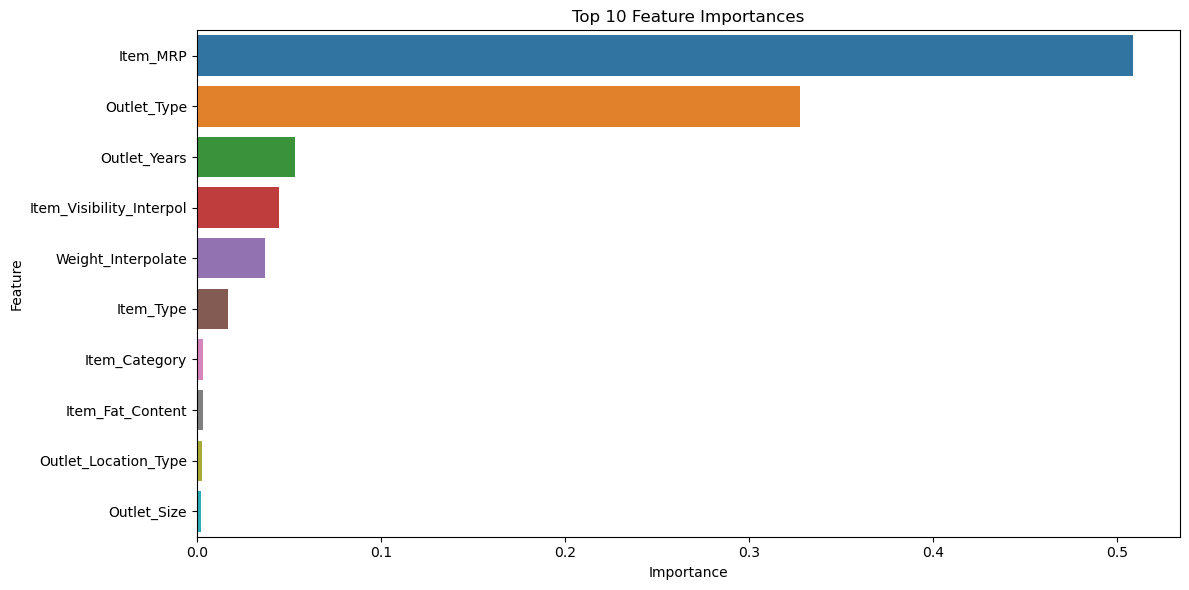

In [125]:
# 8. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [126]:
# 9. Retrain on full training data
final_model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=5, 
                                   min_samples_leaf=2, n_jobs=-1, random_state=42)
final_model.fit(X, y)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [127]:
# 10. Make predictions on test data
test_predictions = final_model.predict(test_processed)

In [128]:
# 11. Prepare submission file
submission = pd.DataFrame({
    'Item_Identifier': test_ids,
    'Outlet_Identifier': test_outlets,
    'Item_Outlet_Sales': test_predictions
})

In [129]:
# 12. Export submission to CSV
submission.to_csv('bigmart_sales_prediction4.csv', index=False)
print("\nSubmission file created successfully!")


Submission file created successfully!


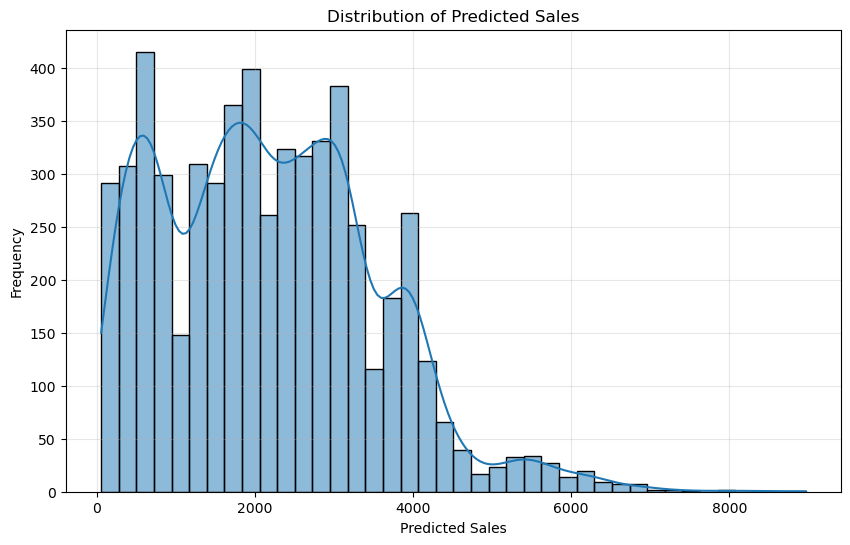

In [130]:
# 13. Additional Analysis: Distribution of predictions
plt.figure(figsize=(10, 6))
sns.histplot(test_predictions, kde=True)
plt.title('Distribution of Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [131]:
print("\nPrediction Summary Statistics:")
print(pd.Series(test_predictions).describe())


Prediction Summary Statistics:
count    5681.000000
mean     2189.216414
std      1349.156226
min        55.230908
25%      1083.339909
50%      2069.364841
75%      3089.700428
max      8964.626738
dtype: float64


In [196]:
train.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Weight_Interpolate'],
      dtype='object')

In [192]:
from xgboost import XGBRFRegressor
# Extract features and target
# 'Item_Visibility_Interpol','Weight_Interpolate','Item_Category','Outlet_Location_Type','Item_Fat_Content'
X = train_processed.drop(['Item_Outlet_Sales','Item_Visibility_Interpol',
                          'Weight_Interpolate','Item_Category','Outlet_Location_Type','Outlet_Years',''
                          'Item_Fat_Content'], axis=1)
test_processed=test_processed.drop(['Item_Category', 'Weight_Interpolate', 'Outlet_Location_Type', 'Item_Visibility_Interpol', 'Item_Fat_Content'],axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
##Initialize XGB
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X_train, y_train,cv=5,scoring='r2')
print(scores.mean())

# train the model
xg.fit(X_train, y_train)

0.5936935173610024


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, reg_alpha=None, ...)

In [193]:
# 7. Model Evaluation
# Predict on validation set
y_pred = xg.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"\nValidation RMSE: {rmse:.4f}")


Validation RMSE: 1022.2017


In [194]:
# Cross-validation score
cv_scores = cross_val_score(xg, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"Cross-Validation RMSE: {-cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Cross-Validation RMSE: 1084.2177 (±9.5434)



Top 10 Important Features:
        Feature  Importance
3   Outlet_Type    0.588147
2   Outlet_Size    0.195501
1      Item_MRP    0.159224
4  Outlet_Years    0.054194
0     Item_Type    0.002934


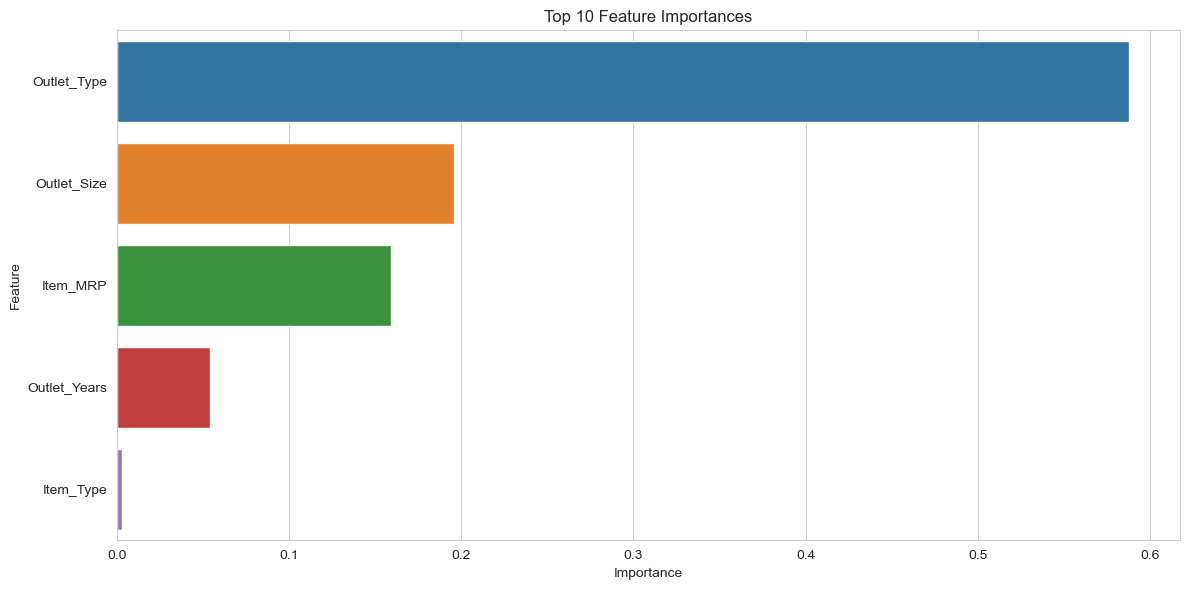

In [195]:
# 8. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xg.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [178]:
# 9. Retrain on full training data
final_model_xg = XGBRFRegressor(n_estimators=100,random_state=42)
final_model_xg.fit(X, y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, reg_alpha=None, ...)

In [179]:
# 10. Make predictions on test data
test_predictions = final_model_xg.predict(test_processed)

In [180]:
# 11. Prepare submission file
submission = pd.DataFrame({
    'Item_Identifier': test_ids,
    'Outlet_Identifier': test_outlets,
    'Item_Outlet_Sales': test_predictions
})
# 12. Export submission to CSV
submission.to_csv('bigmart_sales_prediction6.csv', index=False)
print("\nSubmission file created successfully!")


Submission file created successfully!
